# THE SPARKS FOUNDATION
## MOHITH H PILLAI
## TASK_6 : PREDICTION USING DECISION TREE ALGORITHM   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## LOADING THE DATASET

In [2]:
data = pd.read_csv("C:\\Users\\pc\\Desktop\\csv datasets\\Iris.csv")

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## PREPROCESSING THE DATASET

In [4]:
data = data.drop('Id',axis=1)

In [5]:
data = data.rename(columns = {'SepalLengthCm':'sl','SepalWidthCm':'sw','PetalLengthCm':'pl','PetalWidthCm':'pw'},inplace = False)

In [6]:
data.head(10)

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
data.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['Species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

## PERFORMING LABELENCODING ON SPECIES COLUMN

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [10]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

## SPLITTING THE DATASET INTO X_TRAIN AND Y_TRAIN

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_actual = train_test_split(x,y,test_size = 0.3,random_state = 0)

## IMPORTING DECISION TREE CLASSIFIER FROM SKLEARN

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## PREDICTING THE VALUES

In [13]:
y_pred = dtc.predict(x_test)

In [14]:
results = pd.DataFrame({'predicted values':y_pred,'actual values':y_actual})

In [15]:
results.head(10)

,predicted values,actual values
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


## CALCULATING THE SCORE FOR MODEL

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_actual)

0.9777777777777777

## VISUALIZING THE DECISION TREE MODEL

In [24]:
import sklearn.datasets as datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [18]:
import os 
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

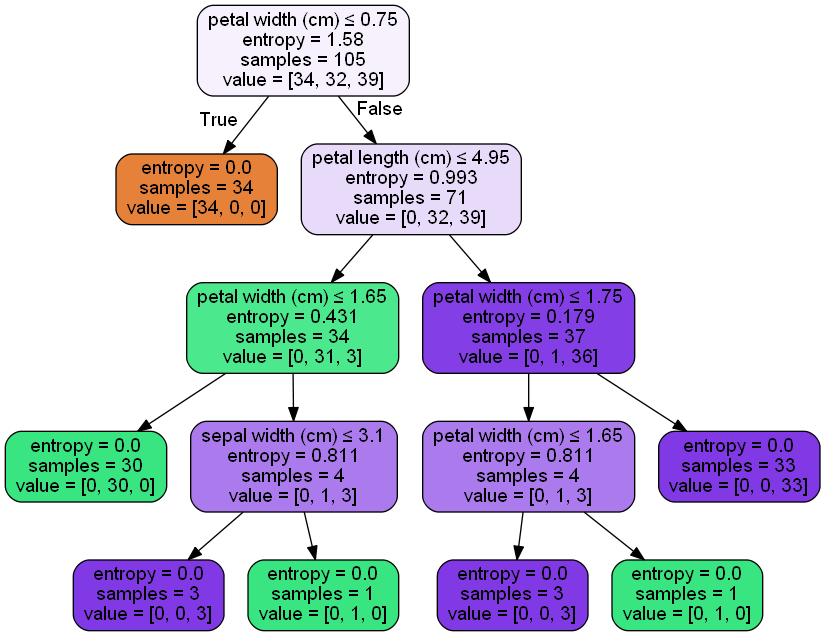

In [25]:

# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())